In [3]:
def select_hard_word():
    '''Function retrieves a random word from a word list stored in a remote location
    '''
    
    import urllib.request
    import random

    word_url = "http://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
    response = urllib.request.urlopen(word_url)
    long_txt = response.read().decode()
    words = long_txt.splitlines()


    secret_word = words[random.randint(0,len(words))].upper()
    return secret_word

def select_easy_word(word_dict, category):
    '''Function selects a random word from a predefined category within a provide dictionary.
    '''
    
    import random
    wordIndex = random.randint(0, len(word_dict[category])-1)
    return word_dict[category][wordIndex].upper()
    
#Define function to display available letters
def avail_letters(guessed, missed, available_letters):
    '''Function displays a colored graphic of letters in the english alphabet and colors them
    based on if they have been correctly or incorrectly guessed previously.
    REQUIRED COLORAMA TO BE INSTALLED. PIP INSTALL COLORAMA
    '''
    import colorama as cl
    guess_locations = []
    missed_locations = []
    for i in guessed:
        guess_locations.append(available_letters.index(i))
    for j in missed:
        missed_locations.append(available_letters.index(j))
    
    print(f"Available Letters in {cl.Fore.BLUE}Blue{cl.Style.RESET_ALL} below. Black/Red letters already guessed.")
    print(f"{cl.Fore.GREEN}Green{cl.Style.RESET_ALL} letters highlighted in {cl.Back.YELLOW}Yellow{cl.Style.RESET_ALL} represent correct guesses")
    for i in range(len(available_letters)):
        if i in missed_locations:
            print(cl.Fore.RED + cl.Back.BLACK + available_letters[i] + cl.Style.RESET_ALL, end=" ")
        elif i in guess_locations:
            print(cl.Fore.GREEN +cl.Back.YELLOW + available_letters[i] + cl.Style.RESET_ALL, end=" ")    
        else:
            print(cl.Fore.BLUE + available_letters[i] + cl.Style.RESET_ALL, end=" ")    
    return ''

#Define function to display current progress
def build_graphic(letters_guessed, secret_word):
    '''Function displays word graphic, indicating the length of word and
    empty spaces where letters have not been correctly guessed yet.
    '''
    result = ''
    for i in secret_word:
        if i in letters_guessed:
            result += i
            result += ' '
        else:
            result += "_ "
        
    return result.upper()

In [1]:
!pip install colorama

In [4]:
def hangman_graphic(i):  
    
    '''Function displays plot of hanging man illustration for Hangman, where i = the number of cumulative 
    incorrect guesses made.
    '''
    
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle
    
    '''Build Gallow'''

    fig, ax = plt.subplots()
    plt.axis("equal") 
    plt.plot([6,11],[1,1],color = 'k', linewidth=5.0)
    plt.plot([9,9],[1,9],color = 'k', linewidth=5.0)
    plt.plot([4,9],[9,9],color = 'k', linewidth=5.0)
    plt.plot([8.9,6.5],[7,8.9],color = 'k', linewidth=5.0)
    plt.plot([4.8,4.8],[7.5,9],color = 'k', linewidth=2.0)
    
    if i == 0:
        plt.show()
        
    elif i == 1:   #First miss
        # head
        circle = plt.Circle((4.8,6.65), 0.8, fill = False, color = 'g')
        ax.add_artist(circle)
        plt.show()
        
    elif i == 2:   #Second miss
        # head
        circle = plt.Circle((4.8,6.65), 0.8, fill = False, color = 'b')
        ax.add_artist(circle)
        # body
        plt.plot([4.8,4.8],[5.8,3.5],color = 'g')
        plt.show()
        
    elif i == 3:    #Third miss (and so on)
        # head
        circle = plt.Circle((4.8,6.65), 0.8, fill = False, color = 'b')
        ax.add_artist(circle)
        # body
        plt.plot([4.8,4.8],[5.8,3.5],color = 'b')
        # add single arm
        plt.plot([3.5,4.8],[5.6,5],color = 'g')
        plt.show()
      
    elif i == 4:
        # head
        circle = plt.Circle((4.8,6.65), 0.8, fill = False, color = 'b')
        ax.add_artist(circle)
        # body
        plt.plot([4.8,4.8],[5.8,3.5],color = 'b')
        # add BOTH arms
        plt.plot([3.5,4.8],[5.6,5],color = 'b')
        plt.plot([4.8, 6.1],[5, 5.6],color = 'g')
        plt.show()
              
    elif i == 5:
        # head
        circle = plt.Circle((4.8,6.65), 0.8, fill = False, color = 'b')
        ax.add_artist(circle)
        # body
        plt.plot([4.8,4.8],[5.8,3.5],color = 'b')
        # arms
        plt.plot([3.5,4.8, 6.1],[5.6,5, 5.6],color = 'b')
        # add LEFT leg
        plt.plot([3.5,4.8],[2.5,3.5],color = 'g')
        plt.show()
              
    elif i == 6:
        # head
        circle = plt.Circle((4.8,6.65), 0.8, fill = False, color = 'b')
        ax.add_artist(circle)
        # body
        plt.plot([4.8,4.8],[5.8,3.5],color = 'b')
        # arms
        plt.plot([3.5,4.8, 6.1],[5.6,5, 5.6],color = 'b')
        # legs
        plt.plot([3.5,4.8],[2.5,3.5],color = 'b')
        plt.plot([4.8, 6.1],[3.5,2.5],color = 'g')    
        plt.show()
        
    elif i == 7:
        # head
        circle = plt.Circle((4.8,6.65), 0.8, fill = False, color = 'b')
        ax.add_artist(circle)
        # body
        plt.plot([4.8,4.8],[5.8,3.5],color = 'b')
        # arms
        plt.plot([3.5,4.8, 6.1],[5.6,5, 5.6],color = 'b')
        # legs
        plt.plot([3.5,4.8],[2.5,3.5],color = 'b')
        plt.plot([4.8, 6.1],[3.5,2.5],color = 'b')
        # Noose
        plt.plot([5,4.6,5,4.6,5,4.6],[5.75,5.75,5.55,5.55,5.35, 5.35],color = 'r', linewidth = 1.2)
        plt.show()
    
    else:
        # head
        circle = plt.Circle((4.8,6.65), 0.8, fill = False, color = 'r')
        ax.add_artist(circle)
        # body
        plt.plot([4.8,4.8],[5.8,3.5],color = 'r')
        # arms
        plt.plot([3.5,4.8, 6.1],[5.6,5, 5.6],color = 'r')
        # legs
        plt.plot([3.5,4.8],[2.5,3.5],color = 'r')
        plt.plot([4.8, 6.1],[3.5,2.5],color = 'r')
        # Noose
        plt.plot([5,4.6,5,4.6,5,4.6],[5.75,5.75,5.55,5.55,5.35, 5.35],color = 'k', linewidth = 1.2)
        # Eyes
        plt.plot([4.4,4.5, 4.6],[7,6.9, 7],color = 'm')
        plt.plot([4.4,4.5, 4.6],[6.8,6.9, 6.8],color = 'm')
        plt.plot([5.0,5.1, 5.2],[7,6.9, 7],color = 'm')
        plt.plot([5.0,5.1, 5.2],[6.8,6.9, 6.8],color = 'm')
        # Mouth
        circle_m = plt.Circle((4.8,6.3), 0.2, fill = False, color = 'm')
        ax.add_artist(circle_m)
        plt.show()

Welcome to Hangman!!!
Select Difficulty: (E)asy or (H)ard:  h

Difficulty Level: Hard Selected! Good luck...

_ _ _ _ _ 


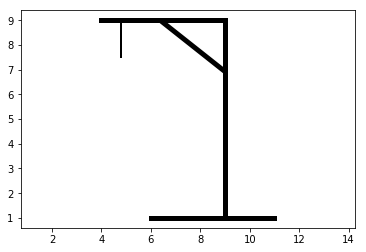


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 8

Guess a single letter! or $ to QUIT: a
a
Good Guess - letter is in word
---------------------------------

_ _ A _ _ 


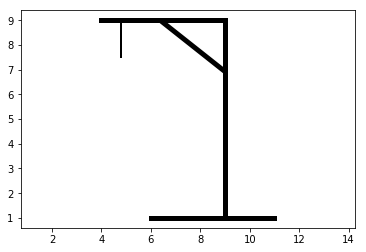


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 8

Guess a single letter! or $ to QUIT: s
s
Terrible guess - letter is not in the word. Try again.
---------------------------------

_ _ A _ _ 


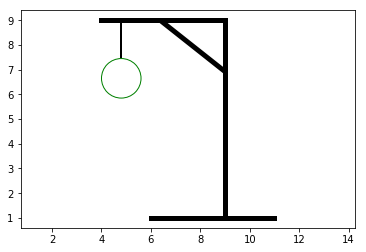


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 7

Guess a single letter! or $ to QUIT: d
d
Terrible guess - letter is not in the word. Try again.
---------------------------------

_ _ A _ _ 


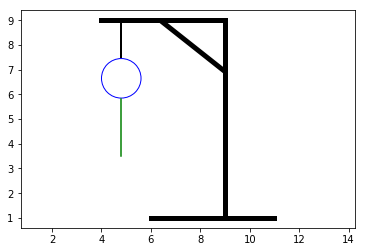


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 6

Guess a single letter! or $ to QUIT: r
r
Good Guess - letter is in word
---------------------------------

_ _ A _ R 


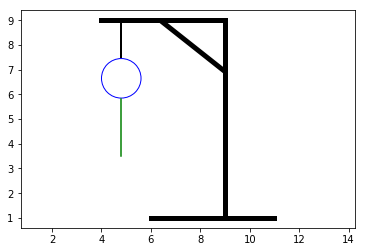


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 6

Guess a single letter! or $ to QUIT: u
u
Terrible guess - letter is not in the word. Try again.
---------------------------------

_ _ A _ R 


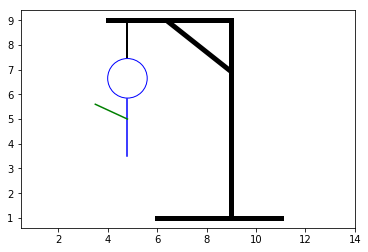


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 5

Guess a single letter! or $ to QUIT: i
i
Good Guess - letter is in word
---------------------------------

_ _ A I R 


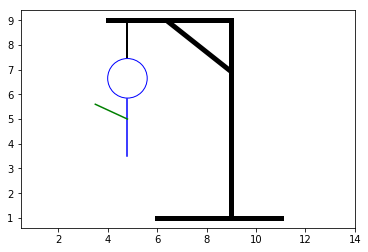


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 5

Guess a single letter! or $ to QUIT: f
f
Terrible guess - letter is not in the word. Try again.
---------------------------------

_ _ A I R 


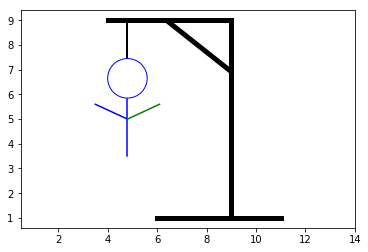


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 4

Guess a single letter! or $ to QUIT: b
b
Good Guess - letter is in word
---------------------------------

B _ A I R 


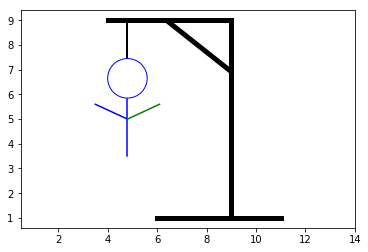


Available Letters in Blue below. Black/Red letters already guessed.
Green letters highlighted in Yellow represent correct guesses
A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

The number of available failed attempts is: 4

Guess a single letter! or $ to QUIT: l
l
Good Guess - letter is in word
---------------------------------

B L A I R 


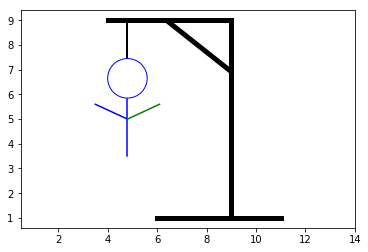

'You WIN and you are AWESOME'

In [5]:
def hangman():
    
    '''Plays a fun interactive game of hangman!'''
 
    print('Welcome to Hangman!!!')
        
    flag  = False  #Difficulty switch
    
    '''Step 1  - Select Difficulty'''
    
    while flag == False:
        difficulty = input("Select Difficulty: (E)asy or (H)ard:  ")
        
        if difficulty.upper() == 'E' or difficulty.upper() == 'EASY':
            print("")
            print(f"Difficulty Level: Easy Selected!")
            diff = 0
            flag = True
            
        elif difficulty.upper() == 'H' or difficulty.upper() == 'HARD':
            print("")
            print(f"Difficulty Level: Hard Selected! Good luck...")
            diff = 1
            flag = True
            
        else:
            print("")
            print("Please enter a valid difficulty")
    
    
    '''Step 2 - Word Selection'''
    
    
    if diff == 1:  #Difficulty = Hard

        secret_word = select_hard_word() 
        misses_left = 8

    elif diff == 0: #Difficulty = Easy
        
        e_flag = False
    
        easy_dict = {'fruits': ['apple','orange','lemon','lime','pear','watermelon','grape','grapefruit','cherry','banana','cantaloupe','mango','strawberry','tomato'],
                 'colors': ['red','orange','yellow','green','blue','indigo','violet','white','black','brown'],
                 'shapes': ['square','triangle','rectangle','circle','ellipse','rhombus','trapezoid','chevron','pentagon','hexagon','septagon','octagon'],
                 'animals': ['aardvark','bat','bear','beaver','cat','cougar','crab','deer','dog','donkey','duck','eagle','fish','frog','goat',
                              'leech','lion','lizard','monkey','moose','mouse','otter','owl','panda','platypus','python','rabbit','rat','shark','sheep','skunk',
                              'squid','tiger','turkey','turtle','weasel','whale','wolf','wombat','zebra'],
                'ironhack': ['armen','deskopolitan','eldiias','prework','git','gitbash','debug','spyder','slack','voltaire']}
        
        print("Easy Mode Activated. Your Available Categories Are:")
        
        for i in easy_dict:
            print(i.upper())
            
        '''Select category from the keys in the easy word dictionary easy_dict'''
        
        while e_flag == False:
        
            category = input("Type a Category from the above list of options:  ")
        
            if category.isalpha() != True:
                print("Please enter a valid category!")
            elif category.lower() not in easy_dict:
                print("Please enter a valid category!")
            else:
                e_flag = True
                
        secret_word = select_easy_word(easy_dict, category.lower())

        misses_left = 8
        
        
    '''Step 3 - Initialize Everything'''
    misses = []
    letters_guessed = []
    available_letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    
    '''Step 4 - Play Game'''
    while misses_left > 0:
            
        print('')
        x=(build_graphic(letters_guessed,secret_word))
        print(x)
        
        
        %matplotlib inline
        
        hangman_graphic(len(set(misses)))
        
        if "_" not in x:
            return("You WIN and you are AWESOME")

        print('')
        print(avail_letters(letters_guessed, misses, available_letters))
        print('')
        print(f'The number of available failed attempts is: {misses_left}')
        print('')
        guess = input('Guess a single letter! or $ to QUIT: ')
        
        print(guess)

        if guess == '$':
            return('User quit, game over')


        #Check errors (incl. letters already tried, not letters, length)

        elif guess.isalpha() == False or len(str(guess)) > 1:
            print('')
            print('Please select an actual single letter from the english alphabet - see list of available letters. Try again.')

        elif guess.upper() in misses or guess.upper() in letters_guessed:
            print('')
            print('Letter already guessed! Pay attention SVP.')
        
        else:
            guess = guess.upper()

            if guess in secret_word:
                letters_guessed.append(guess)
                print('Good Guess - letter is in word')

            else:
                misses.append(guess)
                misses_left -= 1
                print("Terrible guess - letter is not in the word. Try again.")

            print("---------------------------------")

    print(f"You lose and you get nothing. Your life isn't worth living. The word was {secret_word}")
    hangman_graphic(len(set(misses)))
    return('Lost')

hangman()